Temporal MLP - ph

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import math

In [4]:
str_files = ''

#df = pd.read_csv(str_files + "ph.csv",encoding='utf-8',sep=';')
dateparse = lambda dates:pd.datetime.strptime(dates,'%d/%m/%Y')
df = pd.read_csv(str_files + 'od.CSV',encoding='utf-8',sep=';', parse_dates = ['data_coleta'],index_col=['data_coleta'],date_parser=dateparse)

In [5]:
z = df.loc[df['UGRHI'] == '10 - SOROCABA/MEDIO TIETE']

In [6]:
z = z.dropna(axis=1,how='any')

In [7]:
trainingd = z.resample('3M').mean()
trainingd
data = trainingd.iloc[:,1:2].values
train = trainingd.iloc[0:132,1:2].values  
test = trainingd.iloc[132:,1:2].values   
print('treino:',len(train))
print('teste:',len(test))

treino: 132
teste: 34


In [8]:
sc = MinMaxScaler()
train = sc.fit_transform(train)

In [9]:
def prepare_data(data, lags):
    X, y = [], []
    for row in range(len(data) - lags - 1):
        a = data[row:(row + lags), 0]
        X.append(a)
        y.append(data[row + lags, 0])
    return np.array(X), np.array(y)  

In [10]:
sc = MinMaxScaler()
test = sc.fit_transform(test)

In [11]:
lags = 1
X_train, y_train = prepare_data(train, lags)
X_test, y_test = prepare_data(test, lags)
y_true = y_test   
print(len(X_train))

130


In [12]:
mdl = Sequential()
mdl.add(Dense(10, input_dim=lags, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

Train on 130 samples
Epoch 1/100
130/130 - 1s - loss: 0.2306
Epoch 2/100
130/130 - 0s - loss: 0.2228
Epoch 3/100
130/130 - 0s - loss: 0.2153
Epoch 4/100
130/130 - 0s - loss: 0.2078
Epoch 5/100
130/130 - 0s - loss: 0.2003
Epoch 6/100
130/130 - 0s - loss: 0.1932
Epoch 7/100
130/130 - 0s - loss: 0.1861
Epoch 8/100
130/130 - 0s - loss: 0.1792
Epoch 9/100
130/130 - 0s - loss: 0.1723
Epoch 10/100
130/130 - 0s - loss: 0.1657
Epoch 11/100
130/130 - 0s - loss: 0.1592
Epoch 12/100
130/130 - 0s - loss: 0.1528
Epoch 13/100
130/130 - 0s - loss: 0.1465
Epoch 14/100
130/130 - 0s - loss: 0.1402
Epoch 15/100
130/130 - 0s - loss: 0.1341
Epoch 16/100
130/130 - 0s - loss: 0.1282
Epoch 17/100
130/130 - 0s - loss: 0.1226
Epoch 18/100
130/130 - 0s - loss: 0.1170
Epoch 19/100
130/130 - 0s - loss: 0.1115
Epoch 20/100
130/130 - 0s - loss: 0.1065
Epoch 21/100
130/130 - 0s - loss: 0.1015
Epoch 22/100
130/130 - 0s - loss: 0.0967
Epoch 23/100
130/130 - 0s - loss: 0.0922
Epoch 24/100
130/130 - 0s - loss: 0.0878
Epoc

In [13]:
train_score10 = mdl.evaluate(X_train, y_train, verbose=0)
print('Pontuação de Treino: {:.2f} MSE ({:.2f} RMSE)'.format(train_score10, math.sqrt(train_score10)))
test_score10 = mdl.evaluate(X_test, y_test, verbose=0)
print('Pontuação de teste: {:.2f} MSE ({:.2f} RMSE)'.format(test_score10, math.sqrt(test_score10)))

Pontuação de Treino: 0.04 MSE (0.19 RMSE)
Pontuação de teste: 0.04 MSE (0.19 RMSE)


y_test: 32
X_test: 32


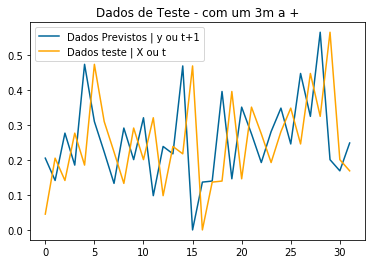

In [14]:
print('y_test:',len(y_test))
print('X_test:',len(X_test))
plt.plot(y_test, label='Dados Previstos | y ou t+1', color='#006699')
plt.plot(X_test, label='Dados teste | X ou t', color='orange')
plt.legend(loc='upper left')
plt.title('Dados de Teste - com um 3m a +')
plt.show()

In [15]:
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)

In [16]:
train_predict = sc.inverse_transform(train_predict)
test_predict = sc.inverse_transform(test_predict)

In [17]:
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags: len(train_predict) + lags, :] = train_predict

In [18]:
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(lags*2)+1:len(data)-1, :] = test_predict

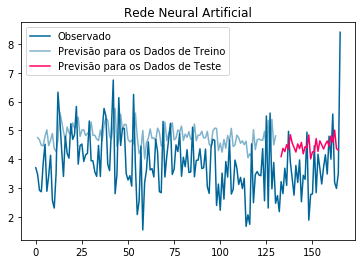

In [19]:
plt.plot(data, label='Observado', color='#006699');
plt.plot(train_predict_plot, label='Previsão para os Dados de Treino', color='#006699', alpha=0.5);
plt.plot(test_predict_plot, label='Previsão para os Dados de Teste', color='#ff0066');
plt.legend(loc='best');
plt.title('Rede Neural Artificial')
plt.show()

In [20]:
mdl = Sequential()
mdl.add(Dense(25, input_dim=lags, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

Train on 130 samples
Epoch 1/100
130/130 - 1s - loss: 0.2228
Epoch 2/100
130/130 - 0s - loss: 0.1987
Epoch 3/100
130/130 - 0s - loss: 0.1767
Epoch 4/100
130/130 - 0s - loss: 0.1557
Epoch 5/100
130/130 - 0s - loss: 0.1369
Epoch 6/100
130/130 - 0s - loss: 0.1204
Epoch 7/100
130/130 - 0s - loss: 0.1060
Epoch 8/100
130/130 - 0s - loss: 0.0935
Epoch 9/100
130/130 - 0s - loss: 0.0826
Epoch 10/100
130/130 - 0s - loss: 0.0736
Epoch 11/100
130/130 - 0s - loss: 0.0664
Epoch 12/100
130/130 - 0s - loss: 0.0603
Epoch 13/100
130/130 - 0s - loss: 0.0552
Epoch 14/100
130/130 - 0s - loss: 0.0512
Epoch 15/100
130/130 - 0s - loss: 0.0481
Epoch 16/100
130/130 - 0s - loss: 0.0450
Epoch 17/100
130/130 - 0s - loss: 0.0430
Epoch 18/100
130/130 - 0s - loss: 0.0415
Epoch 19/100
130/130 - 0s - loss: 0.0405
Epoch 20/100
130/130 - 0s - loss: 0.0398
Epoch 21/100
130/130 - 0s - loss: 0.0396
Epoch 22/100
130/130 - 0s - loss: 0.0395
Epoch 23/100
130/130 - 0s - loss: 0.0394
Epoch 24/100
130/130 - 0s - loss: 0.0393
Epoc

In [21]:
train_score25 = mdl.evaluate(X_train, y_train, verbose=0)
print('Pontuação de Treino: {:.2f} MSE ({:.2f} RMSE)'.format(train_score25, math.sqrt(train_score25)))
test_score25 = mdl.evaluate(X_test, y_test, verbose=0)
print('Pontuação de teste: {:.2f} MSE ({:.2f} RMSE)'.format(test_score25, math.sqrt(test_score25)))

Pontuação de Treino: 0.04 MSE (0.19 RMSE)
Pontuação de teste: 0.03 MSE (0.18 RMSE)


y_test: 32
X_test: 32


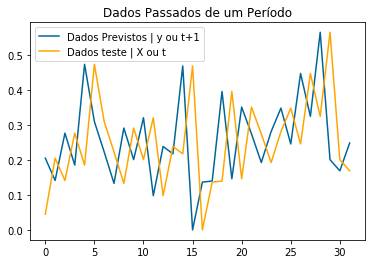

In [22]:
print('y_test:',len(y_test))
print('X_test:',len(X_test))
plt.plot(y_test, label='Dados Previstos | y ou t+1', color='#006699')
plt.plot(X_test, label='Dados teste | X ou t', color='orange')
plt.legend(loc='upper left')
plt.title('Dados Passados de um Período')
plt.show()

In [23]:
train_predict = mdl.predict(X_train)
test_predict = mdl.predict(X_test)

In [24]:
train_predict = sc.inverse_transform(train_predict)
test_predict = sc.inverse_transform(test_predict)

In [25]:
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[lags: len(train_predict) + lags, :] = train_predict

In [26]:
test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(lags*2)+1:len(data)-1, :] = test_predict

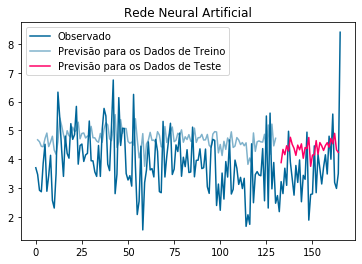

In [27]:
plt.plot(data, label='Observado', color='#006699');
plt.plot(train_predict_plot, label='Previsão para os Dados de Treino', color='#006699', alpha=0.5);
plt.plot(test_predict_plot, label='Previsão para os Dados de Teste', color='#ff0066');
plt.legend(loc='best');
plt.title('Rede Neural Artificial')
plt.show()

In [28]:
mdl = Sequential()
mdl.add(Dense(50, input_dim=lags, activation='relu'))
mdl.add(Dense(1))
mdl.compile(loss='mean_squared_error', optimizer='adam')
mdl.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

Train on 130 samples
Epoch 1/100
130/130 - 1s - loss: 0.4140
Epoch 2/100
130/130 - 0s - loss: 0.3546
Epoch 3/100
130/130 - 0s - loss: 0.3021
Epoch 4/100
130/130 - 0s - loss: 0.2552
Epoch 5/100
130/130 - 0s - loss: 0.2158
Epoch 6/100
130/130 - 0s - loss: 0.1791
Epoch 7/100
130/130 - 0s - loss: 0.1507
Epoch 8/100
130/130 - 0s - loss: 0.1258
Epoch 9/100
130/130 - 0s - loss: 0.1054
Epoch 10/100
130/130 - 0s - loss: 0.0879
Epoch 11/100
130/130 - 0s - loss: 0.0736
Epoch 12/100
130/130 - 0s - loss: 0.0633
Epoch 13/100
130/130 - 0s - loss: 0.0550
Epoch 14/100
130/130 - 0s - loss: 0.0484
Epoch 15/100
130/130 - 0s - loss: 0.0442
Epoch 16/100
130/130 - 0s - loss: 0.0408
Epoch 17/100
130/130 - 0s - loss: 0.0387
Epoch 18/100
130/130 - 0s - loss: 0.0378
Epoch 19/100
130/130 - 0s - loss: 0.0374
Epoch 20/100
130/130 - 0s - loss: 0.0370
Epoch 21/100
130/130 - 0s - loss: 0.0370
Epoch 22/100
130/130 - 0s - loss: 0.0370
Epoch 23/100
130/130 - 0s - loss: 0.0369
Epoch 24/100
130/130 - 0s - loss: 0.0370
Epoc

In [29]:
train_score50 = mdl.evaluate(X_train, y_train, verbose=0)
print('Pontuação de Treino: {:.2f} MSE ({:.2f} RMSE)'.format(train_score50, math.sqrt(train_score50)))
test_score50 = mdl.evaluate(X_test, y_test, verbose=0)
print('Pontuação de teste: {:.2f} MSE ({:.2f} RMSE)'.format(test_score50, math.sqrt(test_score50)))

Pontuação de Treino: 0.04 MSE (0.19 RMSE)
Pontuação de teste: 0.04 MSE (0.20 RMSE)
